In [1]:
import pandas as pd
import wrangle
import new_wrangle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# acquire data

Basic acquire data, we are not modifying anything. We just wan to see the data .

In [ ]:
# use function to acquire data
df1= wrangle.acquire_data()

In [ ]:
#check  info
df1.info()

In [ ]:
df1.shape

In [ ]:
df1= new_wrangle.change_columns(df1)

In [ ]:
df1 = new_wrangle.this_week_next_week_lagger(df1)

In [ ]:
def get_season(now_date):
    '''
    This function gets the season from a dateteime
    '''
    
    Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
    seasons = [('winter', '2000-01-01',  '2000-03-01'),
           ('spring', '2000-03-21',  '2000-06-20'),
           ('summer', '2000-06-21',  '2000-09-22'),
           ('fall', '2000-09-23',  '2000-12-20'),
           ('winter', '2000-12-21',  '2000-12-31')]
        
    now = now_date.replace(year, Y)
    
    season = next(season for season, (start, end) in seasons if start <= now <= end)
    
    return season


def season_column(df):
    '''
    This function creates two new columns 
    Season for this week date 
    And season for next week date
    Uses get_season function
    '''

    df['next_week_season'] = df.dropna().next_week_date.apply(get_season)

    df['this_week_season'] = df.dropna().this_week_date.apply(get_season)

    return df

In [ ]:
df1.info()

In [ ]:
type(df.this_week_date)

In [ ]:
l = [1,2,3]

In [ ]:
pd.Series(l)

In [ ]:
p = ['next_week_date'].astype('string')[0][5:]

In [ ]:
# l=[]
# for r in range (len (df1)):
#    fp= df1['next_week_date'].astype('string')[r][5:]
#     da= '2020'+ fp
    l= l+ da

In [ ]:
l

In [ ]:
get_season(df1)

**Takeaways**
- we have 10 columns and 6435 columns
- no nulls
- we nned to change some columns type

# Ouliers store_size

We are exploring the store_type vs store_size, we notice that there are outliers

In [ ]:
sns.boxplot(x= df1['Type'], y= df1['Size'])

In [ ]:
#check only the outliers
sns.boxplot(x= df1['Type'], y= df1['Size'])
plt.ylim(0,46000)

we can see there are outliers for B and A and we decided to change those to  store type C

In [ ]:
#getting a df that has all store_size < 50000 and df.store_type != "C"
df3 = df1 [(df1.Size < 50000) & (df1.Type != "C")]

In [ ]:
#lets see which stores type A  are df.store_size < 50000
df3[df3.Type == "A"].groupby('Store').count()

In [ ]:
#lets see which stores type A  are df.store_size < 50000
df3[df3.Type == "B"].groupby('Store').count()

**Takeaways**
- Instead of removing theses outliers, we decided to change them to the type based on the size.
- I gave the store_id to Natasha so she is going to change the type in the wrangle function.


# Wrangle

the wrangle_walmar function is renaming columns, adding new columns, dummi variables, and set date as index (datetime type)

In [ ]:
#using the funcion wrangle
df= new_wrangle.wrangle_walmart()

In [ ]:
#chec the data
df.info()

In [ ]:
df.head(1)

In [ ]:
#checking if the store_type has no outliers
sns.boxplot(x= df['store_type'], y= df['store_size'])

In [ ]:
df.select_dtypes(exclude = ['datetime64[ns]', 'object'])

In [ ]:
df.info()

In [ ]:
def distribution (df):
    '''
    takes in a df and plot individual variable distributions excluding object type
    '''
    plt.figure
    plt.style.use("ggplot")
    df2 = df.select_dtypes(exclude = ['datetime64[ns]', 'object'])
    cols =df2.columns.to_list()
    for col in cols:

        plt.hist(df[col],color ='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Number of Weeks ')
        plt.xticks(rotation=45)
        plt.ticklabel_format(style = 'plain')

        plt.show()

In [ ]:
distribution(df)

In [ ]:
df.groupby('store_type').mean()

In [ ]:
#let see distribution by store type
store_type = ["A", "B", "C"]
for store in store_type:
    print("Store type: ", store)
    distribution(df[df.store_type == store])
    

In [ ]:
#how many stores are Type C
len(df[df.store_type == 'C'].store_id.value_counts())

In [ ]:
# storeid for type c
df[df.store_type == 'C'].store_size.value_counts()

In [ ]:
#store if for type B
df[df.store_type == 'B'].store_size.value_counts().sort_index()

In [ ]:
#how many stores are Type B
len(df[df.store_type == 'B'].store_id.value_counts().sort_index())

In [ ]:
#store_Id for type A
df[df.store_type == 'A'].store_size.value_counts().sort_index()

In [ ]:
##how many stores are Type A
len(df[df.store_type == 'A'].store_id.value_counts().sort_index())

In [ ]:
df.info()

In [ ]:
df.shape

**Takeaways**
- after wrangle_walmar we ended with 17 columns, and 6435 observations ( we have nulls)

<hr style="border:2px solid blue"> </hr>

## the following steps were done to complete the wrangle function

# dummies 

we are going to create dummies for :
- Holiday_name


In [ ]:
#create dummy variables for 5 columns
def create_multiple_dummies (df, dumm_col = ['holiday_name', 'season', 'store_type', 'month', 'year']):
    '''
    Takes in a df and columns to create dummies.
    retunr the original df with de new columns (dimmies)
    '''
    #the column year is an integer we need to conver as string
    df['year']= df['year'].astype('string')
    #create dummy variables 
    for col in dumm_col:
        #create dummies
        df_dummies = pd.get_dummies(df[col], dummy_na=False)
        #  concat df_dummies with my df
        df = pd.concat([df, df_dummies], axis =1)
    #drop no_holiday columns and year
    df = df.drop(columns = ['no_holiday', 'year'])
    return df

In [ ]:
def create_dummies (df, dumm_col = ['holiday_name']):
    '''
    Takes in a df and columns to create dummies.
    retunr the original df with de new columns (dummies)
    '''
    #create dummy variables 
    for col in dumm_col:
        #create dummies
        df_dummies = pd.get_dummies(df[col], dummy_na=False)
        #  concat df_dummies with my df
        df = pd.concat([df, df_dummies], axis =1)
    #drop no_holiday columns and year
    df = df.drop(columns = ['no_holiday'])
    return df

In [ ]:
df['holiday_name'].value_counts()

In [ ]:
#test the function before I add it to .py file
df2 = create_dummies(df)

In [ ]:
df2.info()

In [ ]:
df2.columns

# Create new columns

#we need to create new columns  pre- christmas  and tax_season because on exploration(Alberto and Heather ) they found a peak in those dates. 

In [ ]:
#checking the previous weeks for christmas

In [ ]:
df2.head(1)

create a new column for is pre_christmas

-Christmas:

    - 31-Dec-10,  (pre_christmas = 24-Dec-10, 17-Dec 10)
    - 30-Dec-11, (pre_christmas = 23-Dec-11, 16-Dec 11)

In [ ]:
# create new colum and add zeros to everything
df2 ['pre_christmas'] = 0

In [ ]:
df2.columns

In [ ]:
#getting the list for pre_christmas
pre_c= ['2010-12-24', '2010-12-17', '2011-12-23', '2011-12-16']

In [ ]:
#add value 1 for only pre_christmas weeks
#df2.loc[pre_c, 'pre_christmas'] = 1

In [ ]:
#CHECK THE VALUES
#df2['pre_christmas'].value_counts()

#### ADD TAX SEASON

###  first 2 weeks of April
- 2010-04-02 & 2010-04-09
- 2011-04-01 & 2011-04-08
- 2012-04-06 & 2012-04-13

In [ ]:
#crete a new column and assign 0 as value
df2['tax_season'] = 0 

In [ ]:
#getting the list for tax
tax= ['2010-04-02 ', '2010-04-09', '2011-04-01', '2011-04-08', '2012-04-06', '2012-04-13']

In [ ]:
#add value 1 for only for the list above
df2.loc[tax, 'tax_season'] = 1

In [ ]:
#CHECK THE VALUES
df2['tax_season'].value_counts()

# Scale

In [ ]:
df2.head(1)

**note :** before scaling we need to split our data


In [ ]:
#select only the numeric columns 
num_df = df2.select_dtypes(exclude='object')

In [ ]:
num_df.shape

In [ ]:
num_df.head()

In [ ]:
#split using a function
train, test, X_train, y_train, X_test, y_test = new_wrangle.train_test(num_df, 'weekly_sales')

In [ ]:
# imports to scale
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [ ]:
def scaled_df ( train_df , test_df, columns,  scaler):
    '''
    Take in a 3 df and a type of scaler that you  want to  use. it will scale all columns
    except object type. Fit a scaler only in train and tramnsform in train, validate and test.
    returns  new dfs with the scaled columns.
    scaler : MinMaxScaler() or RobustScaler(), StandardScaler() 
    Example:
    scaled_df( X_train , X_test, columns , RobustScaler())
    
    '''
    #import
    from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
    # fit our scaler
    scaler.fit(train_df[columns])
    # get our scaled arrays
    train_scaled = scaler.transform(train_df[columns])
    test_scaled= scaler.transform(test_df[columns])

    # convert arrays to dataframes
    train_scaled_df = pd.DataFrame(train_scaled, columns=columns).set_index([train_df.index.values])
    test_scaled_df = pd.DataFrame(test_scaled, columns=columns).set_index([test_df.index.values])

#     #add the columns that are not scaled
#     train_scaled_df = pd.concat([train_scaled_df, train_df.drop(columns = columns) ], axis= 1 )
#     test_scaled_df = pd.concat([test_scaled_df, test_df.drop(columns = columns) ], axis= 1 )
    #plot
    for col in columns: 
        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(train_df[col], ec='black')
        plt.title('Original')
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.subplot(122)
        plt.hist(train_scaled_df[col],  ec='black')
        plt.title('Scaled')
        plt.xlabel(col)
        plt.ylabel("counts")



    return train_scaled_df,  test_scaled_df

In [ ]:
columns =  X_train.columns.to_list()

In [ ]:
#test the function
#train_Xscaled_df,  test_Xscaled_df= scaled_df( X_train , X_test, columns , MinMaxScaler())

In [ ]:
def train_test(df, target):
    '''
    This function brings in the dataframe and the target feature
    then returns X_train, y_train, X_test and y_test with their respective shapes
    '''
    train = df[:'05-2012'] # includes everything until june 2016
    test = df['06-2012':"2012"] #includes last 6 months

    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]

    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]

    # Have function print datasets shape
    print(f'X_train -> {X_train.shape}')
    print(f'X_test -> {X_test.shape}')

    return train, X_train, y_train, X_test, y_test

In [ ]:
def split_scale and scale (df, target, scaler):
    '''
    takes in a df and creates dummy variables, select only the numeric columns and  split into X_train, y_train, 
    X_test, y_test and scaled X_train, X_test.
    return   X_train_scaled, y_train_scaled, X_test, y_test
    '''



    #split
    train, X_train, y_train, X_test, y_test = train_test(num_df, target)

    #select the columns to scale
    columns =  X_train.select_dtypes(exclude='object').columns.to_list()
    #scale 
    X_train_scaled, X_test_scaled = scaled_df( X_train , X_test, columns , scaler)

    return train, X_train_scaled, X_test_scaled, y_train, y_test
        
        
        
        
    

In [ ]:
#split
train, test, X_train, y_train, X_test, y_test = new_wrangle.train_test(df, 'weekly_sales')

In [ ]:
#select the columns to scale
col =  X_train.select_dtypes(exclude='object').columns.to_list()

In [ ]:
col

In [ ]:
#scale 
X_train_scaled, X_test_scaled = scaled_df( X_train , X_test, col , MinMaxScaler())

In [ ]:
X_train_scaled.info()

In [ ]:
train, X_train_scaled, y_train_scaled, X_test, y_test = prepare_modeling_dummies (df, 'weekly_sales', MinMaxScaler())

In [ ]:
train.shape

In [ ]:
X_train_scaled.shape

# split 

In [ ]:
train, test,  X_train_scaled, X_test_scaled, y_train, y_test = new_wrangle.split_scale(df, 'weekly_sales', MinMaxScaler())

In [ ]:
X_train_scaled.info()

<hr style="border:2px solid blue"> </hr>

# Wrangle and split

let's test the functions wrangle and split and scale

In [2]:
df =new_wrangle.wrangle_walmart()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 2010-02-05_store_1_2010-02-12 to 2012-10-26_store_45_nan
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   store_id                6435 non-null   object        
 1   this_week_date          6435 non-null   datetime64[ns]
 2   this_week_sales         6435 non-null   float64       
 3   this_week_holiday_flag  6435 non-null   int64         
 4   temperature             6435 non-null   int64         
 5   fuel_price              6435 non-null   float64       
 6   CPI                     6435 non-null   float64       
 7   this_week_unemployment  6435 non-null   float64       
 8   store_type              6435 non-null   object        
 9   store_size              6435 non-null   int64         
 10  next_week_1_year_ago    4140 non-null   float64       
 11  next_week_sales_target  6390 non-null   float64       
 12  next_w

**Note:**  we have nulls in our df because we created a new column next_week_1_year_ago  that's why the fisrt year has nulls because we dond have information about the previous year

In [4]:
df.shape

(6435, 20)

In [5]:
df.next_week_holiday_name.value_counts()

no_holiday       5805
pre_christmas     180
labor_day         135
super_bowl        135
christmas          90
thanksgiving       90
Name: next_week_holiday_name, dtype: int64

In [6]:
train, test,  X_train_scaled, X_test_scaled, y_train, y_test = new_wrangle.split_scale(df, 'next_week_sales_target', StandardScaler())

train -> (2866, 18)
test -> (1229, 18)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2866 entries, 2011-09-16_store_12_2011-09-23 to 2011-09-16_store_40_2011-09-23
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   store_id                2866 non-null   object 
 1   this_week_sales         2866 non-null   float64
 2   this_week_holiday_flag  2866 non-null   int64  
 3   temperature             2866 non-null   int64  
 4   fuel_price              2866 non-null   float64
 5   CPI                     2866 non-null   float64
 6   this_week_unemployment  2866 non-null   float64
 7   store_type              2866 non-null   object 
 8   store_size              2866 non-null   int64  
 9   next_week_1_year_ago    2866 non-null   float64
 10  next_week_sales_target  2866 non-null   float64
 11  next_week_holiday_flag  2866 non-null   float64
 12  next_week_holiday_name  2866 non-null   object 
 13  christmas               2866 non-null   uin

In [8]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2866 entries, 2011-09-16_store_12_2011-09-23 to 2011-09-16_store_40_2011-09-23
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   this_week_sales         2866 non-null   float64
 1   this_week_holiday_flag  2866 non-null   float64
 2   temperature             2866 non-null   float64
 3   fuel_price              2866 non-null   float64
 4   CPI                     2866 non-null   float64
 5   this_week_unemployment  2866 non-null   float64
 6   store_size              2866 non-null   float64
 7   next_week_1_year_ago    2866 non-null   float64
 8   next_week_holiday_flag  2866 non-null   float64
 9   christmas               2866 non-null   float64
 10  labor_day               2866 non-null   float64
 11  pre_christmas           2866 non-null   float64
 12  super_bowl              2866 non-null   float64
 13  thanksgiving            2866 non-null   flo

# Explore 

In [9]:
df.shape

(6435, 20)

In [10]:
train.shape

(2866, 18)

In [11]:
train.head(1)

,store_id,this_week_sales,this_week_holiday_flag,temperature,fuel_price,CPI,this_week_unemployment,store_type,store_size,next_week_1_year_ago,next_week_sales_target,next_week_holiday_flag,next_week_holiday_name,christmas,labor_day,pre_christmas,super_bowl,thanksgiving
id,,,,,,,,,,,,,,,,,,
2011-09-16_store_12_2011-09-23,12,889290.23,0,76,3.92,129.431,13.503,B,112238,851919.34,871692.74,0.0,no_holiday,0,0,0,0,0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2866 entries, 2011-09-16_store_12_2011-09-23 to 2011-09-16_store_40_2011-09-23
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   store_id                2866 non-null   object 
 1   this_week_sales         2866 non-null   float64
 2   this_week_holiday_flag  2866 non-null   int64  
 3   temperature             2866 non-null   int64  
 4   fuel_price              2866 non-null   float64
 5   CPI                     2866 non-null   float64
 6   this_week_unemployment  2866 non-null   float64
 7   store_type              2866 non-null   object 
 8   store_size              2866 non-null   int64  
 9   next_week_1_year_ago    2866 non-null   float64
 10  next_week_sales_target  2866 non-null   float64
 11  next_week_holiday_flag  2866 non-null   float64
 12  next_week_holiday_name  2866 non-null   object 
 13  christmas               2866 non-null   uin

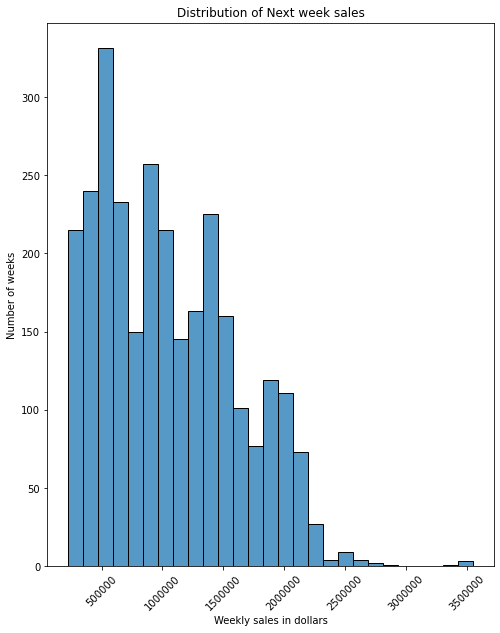

In [13]:
#explore our target
plt.figure(figsize=(8, 10))
sns.histplot(train,
                 x=train['next_week_sales_target'],
                 #hue='loan_status',
                 multiple='layer'
                 )
plt.title("Distribution of Next week sales")
plt.xlabel('Weekly sales in dollars')
plt.ylabel('Number of weeks')
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')

plt.show()

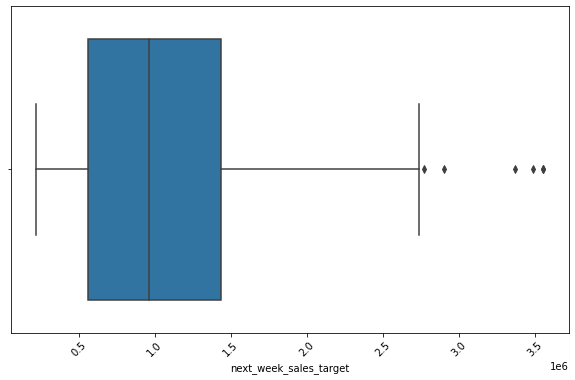

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(train['next_week_sales_target'])
plt.xticks(rotation=45)
#plt.ticklabel_format(style = 'plain')
plt.show()

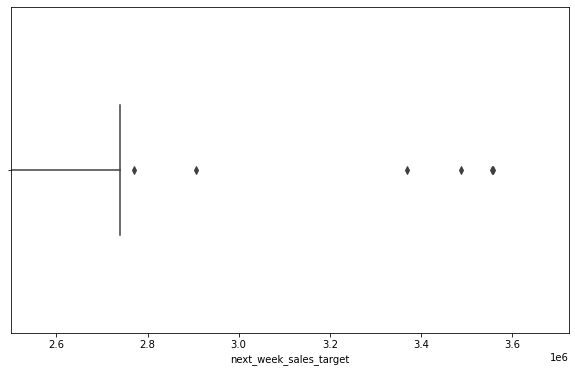

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(train['next_week_sales_target'])
plt.xlim(2500000)
plt.show()

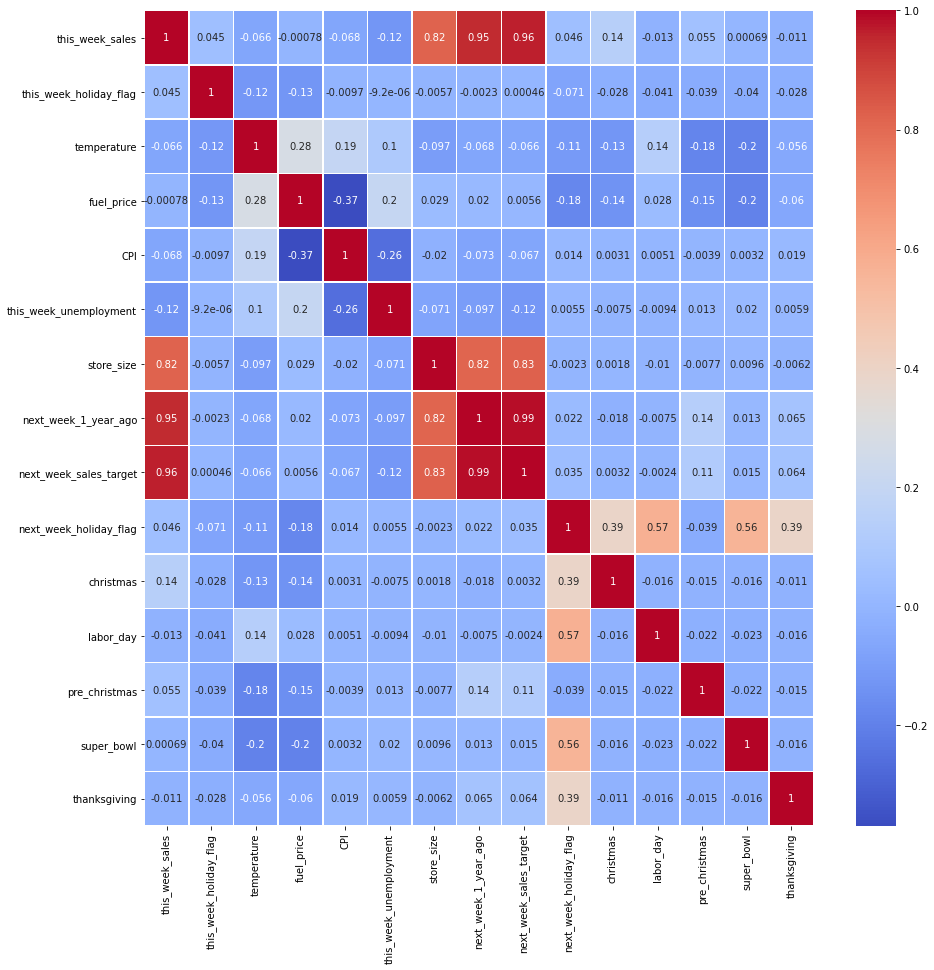

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, linewidth=0.5)
plt.show()

In [17]:
#check the relation of my target with all the featues

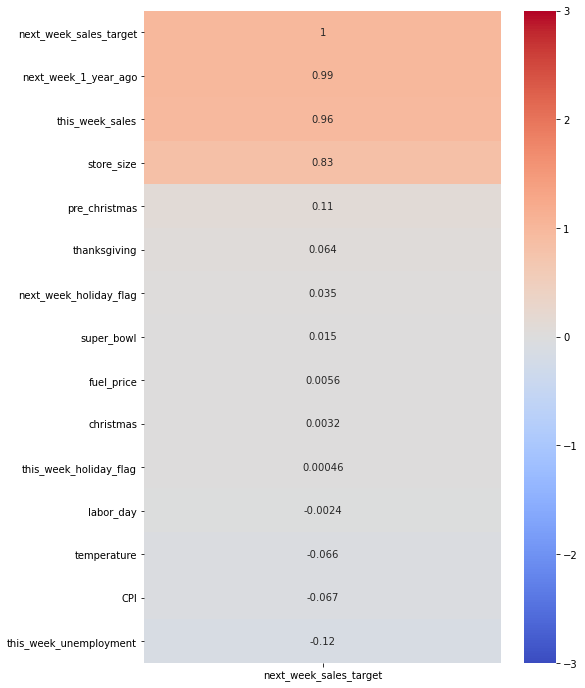

In [18]:
#let's focus on my target
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['next_week_sales_target']].sort_values(by='next_week_sales_target', ascending=False), vmin=-3, vmax=3, annot=True, cmap='coolwarm')

**takeaways**
- next_week_1_year_ago, this_week_sales and store_size have stroger correlation with out target
- pre_christmas has also a positive correlation
- 
- negative correlation this_week_unemployment 

## Exploration target vs Fearture

### -  weekly_sales vs store_size

ValueError: Could not interpret value `weekly_sales` for parameter `x`

<Figure size 1152x720 with 0 Axes>

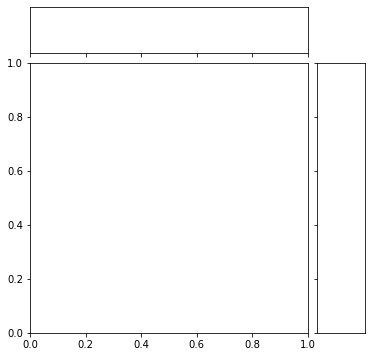

In [19]:
plt.figure(figsize=(16, 10))
sns.jointplot(x= 'weekly_sales', y= 'store_size', data = train, hue ='season')

**takeaways**
- the small the store, less weekly sales
- winter has the greater weekly sales

### -  weekly_sales vs temperature

In [ ]:
plt.figure(figsize=(12, 10))
sns.jointplot(x= 'weekly_sales', y= 'temperature', data = train, hue= "season")
plt.show()

**Takeaways**
- Winter and fall have the greater weekly_sales. may it is because of christmas and blackfriday

In [ ]:
# winter_df = train[train.season == "Winter"][['weekly_sales', 'temperature', 'season']]
# winter_df.head()

In [ ]:
# sns.jointplot(x= 'weekly_sales', y= 'temperature', data = winter_df, hue= "season")

In [ ]:
train.season.unique()

In [ ]:
color_list = ['blue','green', 'red', 'orange']

In [ ]:
for season, color in zip(train.season.unique(), color_list):
    print(season, color)

In [ ]:

for season, c in zip(train.season.unique(), color_list):
    print(season)
    sns.jointplot(x= 'weekly_sales', y= 'temperature', data = train[train.season==season], color= c)
    plt.show()

### -  weekly_sales vs holiday_name

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x= train['holiday_name'], y =train['weekly_sales'] )
plt.show()

**Takeaways**
- the 2 holidays with the greatest weekle_sales are pre_christmas and thanksgiving
-we can see christmas does not have large amount of weekly_sales it is because the people buy before christmas , it is not like blackfriday that the people actually buy in this specific week

### - weekly_sales vs season

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x= train['season'], y =train['weekly_sales'] )

**takeaways**
- we see some outliers but basically there are the weekly sales for thanksgiving and christmas (pre)
- we can say summer has the lowest range of weekly sales amout

In [ ]:
for season, c in zip(train.season.unique(), color_list):
    print(season)
    sns.boxplot(x= train[train.season== season]['weekly_sales'], color = c )
    plt.show()

**takeaways**
- it looks like summer has the lowest median 

<hr style="border:2px solid black"> </hr>

In [ ]:
X_train_scaled.head(1).T

# model

In [9]:
#imports
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor 
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler


from sklearn.preprocessing import PolynomialFeatures

In [10]:

# #conver y_train y _ validate to df
y_train_df = pd.DataFrame( {'actual': y_train})
y_test_df = pd.DataFrame( {'actual': y_test})

In [11]:
def select_kbest  (X_df, y_df, n_features):
    '''
    Takes in the predictors, the target, and the number of features to select (k) ,
    and returns the names of the top k selected features based on the SelectKBest class
    
    X_df : the predictors
    y_df : the target
    n_features : the number of features to select (k)
    Example
    select_kbest(X_train_scaled, y_train, 2)
    '''
    
    f_selector = SelectKBest(score_func=f_regression, k= n_features)
    f_selector.fit(X_df, y_df)
    mask = f_selector.get_support()
    X_df.columns[mask]
    top = list(X_df.columns[mask])
    print(f'The top {n_features} selected feautures based on the SelectKBest class are: {top}' )
    return top

In [12]:
def select_rfe (X_df, y_df, n_features, method):
    '''
    Takes in the predictors, the target, and the number of features to select (k) ,
    and returns the names of the top k selected features based on the Recursive Feature Elimination (RFE)
    
    X_df : the predictors
    y_df : the target
    n_features : the number of features to select (k)
    method : LinearRegression, LassoLars, TweedieRegressor
    Example
    select_rfe(X_train_scaled, y_train, 2, LinearRegression())
    '''
    lm = method
    rfe = RFE(estimator=lm, n_features_to_select= n_features)
    rfe.fit(X_df, y_df)
    top_rfe = list(X_df.columns[rfe.support_])
    print(f'The top {n_features} selected feautures based on the the RFE class class are: {top_rfe}' )
    print(pd.Series(dict(zip(X_df.columns, rfe.ranking_))).sort_values())
    return top_rfe


In [13]:
def regression_errors(df, y, yhat):
    '''
    Takes in a dataframe , y = column with actual_values and yhat= name of the columns with predicted_values
    and calculate:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
    Returns a dictionary with all these values.
    Example:
    plot_residuals(df, 'tip', 'yhat')
    '''
    #import
    from sklearn.metrics import  mean_squared_error
    from math import sqrt
    
    
    #calculate SSE using sklearn
    SSE = mean_squared_error(df[y], df[yhat])*len(df)
    #explained sum of squares (ESS)
    ESS = ((df[yhat] - df[y].mean())**2).sum()
    #total sum of squares (TSS)
    TSS = ((df[y] - df[y].mean())**2).sum()
    #mean squared error (MSE)
    MSE = mean_squared_error(df[y], df[yhat])
    #root mean squared error (RMSE)
    RMSE = sqrt(MSE)
    
    #create a dictionary
    m= {
        'sse': SSE,
        'ess': ESS,
        'rmse': RMSE,
        'tss': TSS,
        'mse': MSE,
        'r2': ESS/TSS,
    }

    return m

In [14]:
def create_model (X_df_scaled, y_df, actual, method, name):
    '''
    takes in features scaled df, target df, name of actual target, 
    type of method and the name of the selected method and 
    returns a dictionary that contains calculated regression errors.
    
    X_df_scaled : df that contains scaled featues
    y_df: target df
    actual: name of the column where is actual value of the target
    mehod: type of method to create the model object
    name: enter the new name for your model
    
    Example:
    create_model(X_train_scaled[top_sb], y_train, 'actual', LinearRegression(normalize=True), 'modelOLS' )
    '''
    # fit the thing
    method.fit(X_df_scaled, y_df[actual])

    # predict train
    y_df[name] = method.predict(X_df_scaled)

    #calculate regression errors using a created function
    train_eval = regression_errors(y_df, actual, name)

    return train_eval

In [15]:
def report(metric_df):
    
    from IPython.display import display, HTML
    rmse_base = metric_df.iloc[0,2]
    print(f'These are the models that perform better than our baseline rmse: {rmse_base}')
    dfs =metric_df[['model', 'rmse_validate']][metric_df['rmse_validate'] < rmse_base]
    display(HTML(dfs.to_html()))
    
    
    min_val = metric_df['rmse_validate'].idxmin()
    metric_df.iloc[min_val][0]
    rsme_bet = round(metric_df['rmse_validate'].iloc[min_val], 2)
    print('-----------------------------------------------------------------------------------------------')
    print(f'   ********** The model with the less  rmse_validate  is {metric_df.iloc[min_val][0] }  rmse:{rsme_bet} **********             ')
    print('-----------------------------------------------------------------------------------------------')
    print(' ')
    min_val = metric_df['r^2_validate'].idxmax()
    metric_df.iloc[min_val][0]
    print(f'The model with r^2 validate closer to 1 is ', metric_df.iloc[min_val][0])
    
    display(HTML(metric_df.to_html()))
    return

In [16]:
def baseline_errors(df, y, option ):
    '''
    Takes in a dataframe , y = column with actual_values 
    and calculate:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
    Returns a dictionary with all these values
    Example:
    baseline_mean_errors(y_train, 'actual')
    '''
    #import
    from sklearn.metrics import  mean_squared_error
    from math import sqrt

    #baseline
    if option == 'mean':
        df['yhat_baseline_mean'] = df[y].mean()
        col = 'yhat_baseline_mean'
    elif option == 'median':
        df['yhat_baseline_median'] = df[y].median()
        col = 'yhat_baseline_median'
    else:
        return print("please select the correct option: 'mean' or 'median' ")
        
    

    #calculate SSE using sklearn
    SSE_baseline = mean_squared_error(df[y], df[col])*len(df)
    #explained sum of squares (ESS)
    ESS_b = ((df[col] - df[y].mean())**2).sum()
    #total sum of squares (TSS)
    TSS_b = ((df[y] - df[y].mean())**2).sum()
    #mean squared error (MSE)
    MSE_baseline = mean_squared_error(df[y], df[col])
    #root mean squared error (RMSE)
    RMSE_baseline = sqrt(MSE_baseline)
    
    #create dicc
    b ={
        'sse': SSE_baseline,
        'mse': MSE_baseline,
        'rmse': RMSE_baseline,
         'tss': TSS_b,
        'ess' : ESS_b,
        'mse': MSE_baseline,
        'r2': ESS_b/TSS_b,       
    }

    return b

**- Baseline**

In [17]:
y_train.mean()

1052290.9527110963

In [18]:
y_train.median()

965284.38

In [19]:
train.columns

Index(['store_id', 'this_week_sales', 'this_week_holiday_flag', 'temperature',
       'fuel_price', 'CPI', 'this_week_unemployment', 'store_type',
       'store_size', 'next_week_1_year_ago', 'next_week_sales_target',
       'next_week_holiday_flag', 'next_week_holiday_name', 'christmas',
       'labor_day', 'pre_christmas', 'super_bowl', 'thanksgiving'],
      dtype='object')

In [20]:
#create baseline using mean (I'm using my function to calculate rmse)
tra = baseline_errors(y_train_df, 'actual', 'mean')
tra['rmse']

558467.0491489187

In [21]:
#create a df to store metrics
metric_df = pd.DataFrame(data = [{
    'model': 'mean_baseline',
    'rmse_train' : round(tra['rmse'], 2),
    'r^2' : 0}])

In [22]:

#baseline version 2 using last years sales
y_train_df['last_year_baseline'] = train['next_week_1_year_ago']

In [23]:
import math
from sklearn.metrics import mean_squared_error, explained_variance_score
#calculate RMSE for baseline model
rmse_baseline2_train= math.sqrt(mean_squared_error(y_train_df.actual, y_train_df.last_year_baseline))

In [24]:
rmse_baseline2_train

91145.28223498359

In [25]:
#add the mretic to our df
metric_df = metric_df.append(
    {
    'model': 'baseline(using last year sales)',
    'rmse_train':rmse_baseline2_train,    
    'r^2' : 0}, ignore_index=True)

In [26]:
metric_df

,model,rmse_train,r^2
0,mean_baseline,558467.050000,0
1,baseline(using last year sales),91145.282235,0


In [35]:
def gridsearch ( X_df , y_df , model, params, score):
    '''
    '''
    grid = GridSearchCV(model, params, cv=5, scoring= score )
    grid.fit(X_df, y_df)
    #see the cross validation results in the cv_results_ property of the object we created.
    results = grid.cv_results_
    # I will use mean_test_score
    test_scores = results['mean_test_score']
    #GETTING THE PARAMETERS
    params = results['params']
    #We can combine these features together into a data frame to see how our different models perform:
    for p, s in zip(params, test_scores):
        p['score'] = s

    return pd.DataFrame(params).sort_values(by='score')

##  LinearRegression (OLS)

### - Gridsearch

In [36]:
#specify the parameters we wish to use as a dictionary, then use that dictionary when we create the class.
params = {'normalize': [ True, False],
          'fit_intercept': [True, False]}

In [37]:
#use a gridsearch function using 
gridsearch (X_train_scaled, y_train, LinearRegression() , params, 'neg_root_mean_squared_error')

,fit_intercept,normalize,score
2,False,True,-1.060025e+06
3,False,False,-1.060025e+06
1,True,False,-7.171068e+04
0,True,True,-7.171068e+04


### OLS uising  select K best (6)

In [38]:
#using my function for SelectkBest
top_sb =select_kbest(X_train_scaled, y_train, 8)

The top 8 selected feautures based on the SelectKBest class are: ['this_week_sales', 'temperature', 'CPI', 'this_week_unemployment', 'store_size', 'next_week_1_year_ago', 'pre_christmas', 'thanksgiving']


In [39]:
#create the model
ols_sb = create_model(X_train_scaled[top_sb], y_train_df, 'actual',\
                       LinearRegression(normalize=True,\
                        fit_intercept=True ), 'modelOLS' )
ols_sb['rmse']


73342.8222175832

#### cross validation

In [40]:
#create the model
clf = LinearRegression(normalize=True, fit_intercept=True )
#cv = number of folds
cross_val_score(clf, X_train_scaled[top_sb], y_train, cv=3, scoring = 'neg_root_mean_squared_error')

array([-73956.67063489, -74418.3534854 , -73924.13321404])

### OLS uising  RFE (8)

In [41]:
#uise the fucntion to get RFE
top_rfe = select_rfe(X_train_scaled, y_train, 10,LinearRegression(normalize=False, fit_intercept=True ))

The top 10 selected feautures based on the the RFE class class are: ['this_week_sales', 'this_week_holiday_flag', 'fuel_price', 'CPI', 'this_week_unemployment', 'store_size', 'next_week_1_year_ago', 'christmas', 'labor_day', 'thanksgiving']
this_week_sales           1
this_week_holiday_flag    1
fuel_price                1
CPI                       1
this_week_unemployment    1
store_size                1
next_week_1_year_ago      1
christmas                 1
labor_day                 1
thanksgiving              1
super_bowl                2
pre_christmas             3
temperature               4
next_week_holiday_flag    5
dtype: int64


In [42]:
#create the model
ols_rfe = create_model(X_train_scaled[top_rfe], y_train_df, 'actual', LinearRegression(normalize=True, fit_intercept=True ), 'modelOLS' )
ols_rfe['rmse']

71395.98290061574

### - cross validation

In [43]:
#create the model
clf = LinearRegression(normalize=True, fit_intercept=True )
#cv = number of folds
cross_val_score(clf, X_train_scaled[top_rfe], y_train, cv=3, scoring = 'neg_root_mean_squared_error')

array([-71590.5280877 , -72041.66437452, -72473.00155528])

Note: we are going to use ols_rfe  model

In [44]:
#add the mretic to our df
metric_df = metric_df.append(
    {
    'model': 'ols_rfe',
    'rmse_train': ols_rfe['rmse'],    
    'r^2' : ols_rfe['r2']}, ignore_index=True)

In [45]:
metric_df

,model,rmse_train,r^2
0,mean_baseline,558467.050000,0.000000
1,baseline(using last year sales),91145.282235,0.000000
2,ols_rfe,71395.982901,0.983656


## LassoLars

### Gridsearch

In [46]:
#specify the parameters we wish to use as a dictionary, then use that dictionary when we create the class.
params = {
          'normalize': [True, False],
          'fit_intercept':[True, False],
           'alpha': [1.0, 0]
         }

In [47]:
#use the function to get the combinations of parameters
gridsearch (X_train_scaled, y_train, LassoLars() , params, 'neg_root_mean_squared_error')

,alpha,fit_intercept,normalize,score
6,0.0,False,True,-1.060025e+06
7,0.0,False,False,-1.060025e+06
2,1.0,False,True,-1.060025e+06
3,1.0,False,False,-1.060025e+06
0,1.0,True,True,-7.171113e+04
1,1.0,True,False,-7.171068e+04
4,0.0,True,True,-7.171068e+04
5,0.0,True,False,-7.171068e+04


### RFE 

In [48]:
#get the 9 features
top_rfe = select_rfe(X_train_scaled, y_train, 7, LassoLars(alpha = 1, normalize= False, fit_intercept= True) )

The top 7 selected feautures based on the the RFE class class are: ['this_week_sales', 'this_week_holiday_flag', 'this_week_unemployment', 'store_size', 'next_week_1_year_ago', 'christmas', 'thanksgiving']
this_week_sales           1
this_week_holiday_flag    1
this_week_unemployment    1
store_size                1
next_week_1_year_ago      1
christmas                 1
thanksgiving              1
next_week_holiday_flag    2
fuel_price                3
CPI                       4
pre_christmas             5
temperature               6
labor_day                 7
super_bowl                8
dtype: int64


In [49]:
#create the model
lasso_rfe = create_model(X_train_scaled[top_rfe], y_train_df, 'actual', LassoLars(alpha = 1, normalize= False, fit_intercept= True), 'modelLasso' )
lasso_rfe['rmse']

71737.4410107818

### -cross validation 

In [50]:
#create the model
clf = LassoLars(alpha = 1, normalize= False, fit_intercept= True)
#cv = number of folds
cross = cross_val_score(clf, X_train_scaled[top_rfe], y_train, cv=3, scoring = 'neg_root_mean_squared_error')
cross

array([-72128.39596284, -72321.44024369, -72463.66946815])

### select K best

In [51]:
#using my function for SelectkBest
top_sb =select_kbest(X_train_scaled, y_train, 10)

The top 10 selected feautures based on the SelectKBest class are: ['this_week_sales', 'temperature', 'CPI', 'this_week_unemployment', 'store_size', 'next_week_1_year_ago', 'next_week_holiday_flag', 'pre_christmas', 'super_bowl', 'thanksgiving']


In [52]:
lasso_skb = create_model(X_train_scaled[top_sb], y_train_df, 'actual', LassoLars(alpha = 1, normalize= False, fit_intercept= True), 'modelLasso' )
lasso_skb['rmse']

73089.36495109882

In [53]:
#create the model
clf = LassoLars(alpha = 1, normalize= False, fit_intercept= True)
#cv = number of folds
cross= cross_val_score(clf, X_train_scaled[top_sb], y_train, cv=3, scoring = 'neg_root_mean_squared_error')
cross

array([-73821.17465668, -74123.88517969, -73620.16271972])

In [54]:
#add the best model and its metrics
metric_df = metric_df.append(
    {
    'model': 'lasso_rfe',
    'rmse_train': lasso_rfe['rmse'],    
    'r^2' : lasso_rfe['r2']}, ignore_index=True)

In [55]:
metric_df

,model,rmse_train,r^2
0,mean_baseline,558467.050000,0.000000
1,baseline(using last year sales),91145.282235,0.000000
2,ols_rfe,71395.982901,0.983656
3,lasso_rfe,71737.441011,0.983496



## TweedieRegressor (GLM)

### - GridSearch



In [56]:
#specify the parameters we wish to use as a dictionary, then use that dictionary when we create the class.
params = {
          'power': [0.0, 1],
           'fit_intercept' : [True , False],
          'warm_start': [True, False], 
           'alpha': [1.0, 0.0]
         }

In [57]:
gridsearch (X_train_scaled, y_train,TweedieRegressor() , params, 'neg_root_mean_squared_error')

,alpha,fit_intercept,power,warm_start,score
6,1.0,False,1.0,True,-1.216150e+06
7,1.0,False,1.0,False,-1.216150e+06
14,0.0,False,1.0,True,-1.216145e+06
15,0.0,False,1.0,False,-1.216145e+06
4,1.0,False,0.0,True,-1.070022e+06
5,1.0,False,0.0,False,-1.070022e+06
12,0.0,False,0.0,True,-1.060025e+06
13,0.0,False,0.0,False,-1.060025e+06
0,1.0,True,0.0,True,-1.827343e+05
1,1.0,True,0.0,False,-1.827343e+05


### create model using RFE

In [58]:
#use function to get the top 6 RFE
top_rfe = select_rfe(X_train_scaled, y_train, 6, TweedieRegressor(alpha =0 , fit_intercept= True, power=0 ,\
                                                                  warm_start= False) )

The top 6 selected feautures based on the the RFE class class are: ['this_week_sales', 'this_week_unemployment', 'store_size', 'next_week_1_year_ago', 'christmas', 'thanksgiving']
this_week_sales           1
this_week_unemployment    1
store_size                1
next_week_1_year_ago      1
christmas                 1
thanksgiving              1
this_week_holiday_flag    2
fuel_price                3
labor_day                 4
CPI                       5
super_bowl                6
pre_christmas             7
temperature               8
next_week_holiday_flag    9
dtype: int64


In [59]:
#create the model
gml_rfe = create_model(X_train_scaled[top_rfe], y_train_df, 'actual',TweedieRegressor(alpha =0 , fit_intercept= True, power=0 ,\
                                                                  warm_start= False), 'modelgml' )
gml_rfe['rmse']

72085.78651585152

### - cross validation

In [60]:
#create the model
clf = TweedieRegressor(alpha =0 , fit_intercept= True, power=0 ,warm_start= False)
#cv = number of folds
cross = cross_val_score(clf, X_train_scaled[top_rfe], y_train, scoring = 'neg_root_mean_squared_error', cv=3)
cross

array([-72664.12455115, -72607.89000314, -72509.44051554])

### create model using select kbest

In [61]:
#using my function for SelectkBest
top_sb =select_kbest(X_train_scaled, y_train, 5)

The top 5 selected feautures based on the SelectKBest class are: ['this_week_sales', 'this_week_unemployment', 'store_size', 'next_week_1_year_ago', 'pre_christmas']


In [62]:
gml_skb = create_model(X_train_scaled[top_sb], y_train_df, 'actual',TweedieRegressor(alpha =0 , fit_intercept= True, power=0 ,\
                                                                  warm_start= False), 'modelgml' )
gml_skb['rmse']

74358.31249146597

In [63]:
#create the model
clf = TweedieRegressor(alpha =0 , fit_intercept= True, power=0 ,warm_start= False)
#cv = number of folds
cross = cross_val_score(clf, X_train_scaled[top_sb], y_train, scoring = 'neg_root_mean_squared_error',cv=3)
cross

array([-75446.62174971, -73234.40079219, -75603.73169945])

In [64]:
#add the best model
metric_df = metric_df.append(
    {
    'model': 'gml_rfe',
    'rmse_train': gml_rfe['rmse'],    
    'r^2' : gml_rfe['r2']}, ignore_index=True)

In [65]:
metric_df

,model,rmse_train,r^2
0,mean_baseline,558467.050000,0.000000
1,baseline(using last year sales),91145.282235,0.000000
2,ols_rfe,71395.982901,0.983656
3,lasso_rfe,71737.441011,0.983496
4,gml_rfe,72085.786516,0.983339


## plynomial Regression

###  select k best 

In [66]:
#using my function for SelectkBest
top_sb =select_kbest(X_train_scaled, y_train, 6)

The top 6 selected feautures based on the SelectKBest class are: ['this_week_sales', 'CPI', 'this_week_unemployment', 'store_size', 'next_week_1_year_ago', 'pre_christmas']


In [67]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree = 3) 

# fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(X_train_scaled[top_sb])

# transform X_validate_scaled & X_test_scaled
X_test_degree3 = pf.transform(X_test_scaled[top_sb])

### GridSearch

In [68]:
#specify the parameters we wish to use as a dictionary, then use that dictionary when we create the class.
params = {
          'normalize': [True, False],
          'fit_intercept':[True, False],
         }

In [69]:
gridsearch (X_train_degree3, y_train, LinearRegression() , params, 'neg_root_mean_squared_error')

,fit_intercept,normalize,score
0,True,True,-69355.800702
2,False,True,-69332.376884
3,False,False,-69332.376884
1,True,False,-69279.301176


In [70]:
gridsearch (X_train_degree3, y_train, LinearRegression() , params, 'r2')

,fit_intercept,normalize,score
0,True,True,0.984509
2,False,True,0.984520
3,False,False,0.984520
1,True,False,0.984542


In [71]:
pol_skb = create_model(X_train_degree3, y_train_df, 'actual',LinearRegression( normalize=True, fit_intercept = True ), 'modelpol' )
pol_skb['rmse']

64761.66145648889

In [72]:
#create the model
clf = LinearRegression( normalize=False, fit_intercept = True )
#cv = number of folds
cross = cross_val_score(clf, X_train_degree3, y_train, cv=3, scoring = 'neg_root_mean_squared_error')
cross

array([-71885.96436486, -71473.20399894, -72851.07486395])

In [73]:
metric_df = metric_df.append(
    {
    'model': 'pol3_skb',
    'rmse_train': pol_skb['rmse'],    
    'r^2' : pol_skb['r2']}, ignore_index=True)

In [74]:
# RFE

In [94]:
 top_rfe = select_rfe(X_train_scaled, y_train, 4, LinearRegression(normalize=False, fit_intercept = False) )

The top 4 selected feautures based on the the RFE class class are: ['this_week_sales', 'next_week_1_year_ago', 'christmas', 'thanksgiving']
this_week_sales            1
next_week_1_year_ago       1
christmas                  1
thanksgiving               1
store_size                 2
this_week_unemployment     3
this_week_holiday_flag     4
fuel_price                 5
labor_day                  6
CPI                        7
super_bowl                 8
pre_christmas              9
temperature               10
next_week_holiday_flag    11
dtype: int64


In [114]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree = 4) 

# fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(X_train_scaled[top_rfe])

# transform X_validate_scaled & X_test_scaled
X_test_degree3 = pf.transform(X_test_scaled[top_rfe])

In [115]:
gridsearch (X_train_degree3, y_train, LinearRegression() , params, 'neg_root_mean_squared_error')

,fit_intercept,normalize,score
1,True,False,-69804.159022
0,True,True,-69743.180664
2,False,True,-69741.219206
3,False,False,-69741.219206


In [116]:
#create the model
pol_rfe = create_model(X_train_degree3, y_train_df, 'actual',LinearRegression( normalize=False, fit_intercept = False ), 'modelpol' )
pol_rfe['rmse']

66914.54180380065

In [117]:
#create the model
clf = LinearRegression( normalize=True, fit_intercept = True )
#cv = number of folds
cross = cross_val_score(clf, X_train_degree3, y_train, cv=3, scoring = 'neg_root_mean_squared_error')
cross

array([-68703.11515664, -69909.43652615, -71253.76700273])

In [118]:
metric_df = metric_df.append(
    {
    'model': 'pol3_rfe',
    'rmse_train': pol_rfe['rmse'],    
    'r^2' : pol_rfe['r2']}, ignore_index=True)

### Degree 2 

In [124]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree = 2) 

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_test_degree2 = pf.transform(X_test_scaled)

In [125]:
gridsearch (X_train_degree2, y_train, LinearRegression() , params, 'neg_root_mean_squared_error')

,fit_intercept,normalize,score
1,True,False,-66172.981955
2,False,True,-66050.818512
3,False,False,-66050.818512
0,True,True,-66039.799601


In [126]:
pol_dg2 = create_model(X_train_degree2, y_train_df, 'actual',LinearRegression( normalize=True, fit_intercept = True ), 'modelpol' )
pol_dg2['rmse']

62567.27752677026

In [127]:
#create the model
clf = LinearRegression( normalize=True, fit_intercept = True )
#cv = number of folds
cross = cross_val_score(clf, X_train_degree2, y_train, cv=3, scoring = 'neg_root_mean_squared_error')
cross

array([-68129.64113608, -67569.61424463, -75181.59396424])

In [128]:
metric_df = metric_df.append(
    {
    'model': 'pol_dg2',
    'rmse_train': pol_dg2['rmse'],    
    'r^2' : pol_dg2['r2']}, ignore_index=True)

In [129]:
metric_df

,model,rmse_train,r^2
0,mean_baseline,558467.050000,0.000000
1,baseline(using last year sales),91145.282235,0.000000
2,ols_rfe,71395.982901,0.983656
3,lasso_rfe,71737.441011,0.983496
4,gml_rfe,72085.786516,0.983339
5,pol3_skb,64761.661456,0.986693
6,pol3_rfe,66914.541804,0.985360
7,pol_dg2,62567.277527,0.987563


#  Test

In [134]:
#use my function to create and calculate the metrics
pol_reg_test =  create_model(X_test_degree2, 
                              y_test_df, 'actual',LinearRegression( normalize=True, fit_intercept = True ), 'test_polreg' )

In [135]:
pol_reg_test['rmse']

65360.335150104765